# Advanced Machine Learning Lab (PDS2101)


Submitted By : Subrat Ku Nanda

## Experiment - 1.1
Aim of your experiment : Write a Python program to implement different activation functions and their variants from scratch

### 01 - Binary Step Activation Function

#### Theory :

Binary step function returns value either 0 or 1.

It returns '0' if the input is the less then zero
It returns '1' if the input is greater than zero

#### mathematically-

      f(x) = 1, x>=0
           = 0, x<0

It returns '0' is the input is less then zero otherwise it returns one




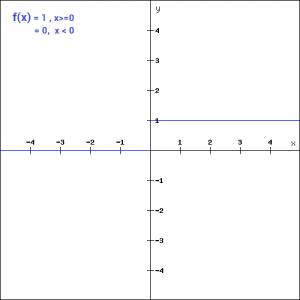





#### Code snippet :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def binary_step(x):
    if x<0:
        return 0
    else:
        return 1

In [ ]:
binary_step(5), binary_step(-1)

(1, 0)

In [ ]:
#Alternative

def binaryStep(x):
    ''' It returns '0' is the input is less then zero otherwise it returns one '''
    return np.heaviside(x,1)

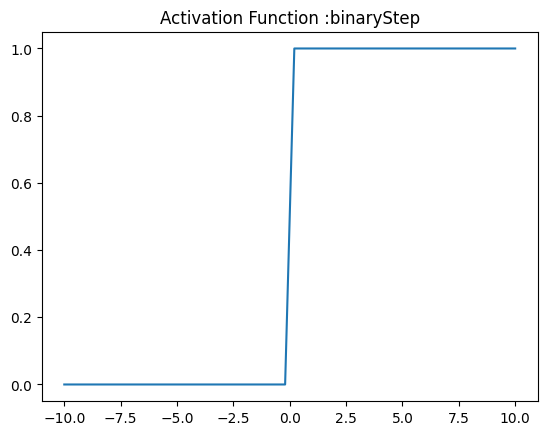

In [ ]:
# Binary Step
x = np.linspace(-10, 10)
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Activation Function :binaryStep')
#plt.figure(figsize=(4,4))
plt.show()

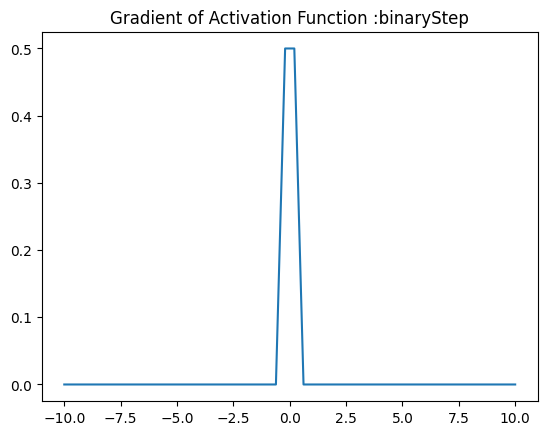

In [ ]:
x = np.linspace(-10, 10)
y=binaryStep(x)
z=np.gradient(y)
plt.plot(x, z)
plt.axis('tight')
plt.title('Gradient of Activation Function :binaryStep')
plt.show()

#### Observation :

The binary step function can be used as an activation function while creating a binary classifier. This function will not be useful when there are multiple classes in the target variable. That is one of the limitations of binary step function.

Moreover, the gradient of the step function is zero which causes a hindrance in the back propagation process. That is, if you calculate the derivative of f(x) with respect to x, it comes out to be 0.

f'(x) = 0, for all x

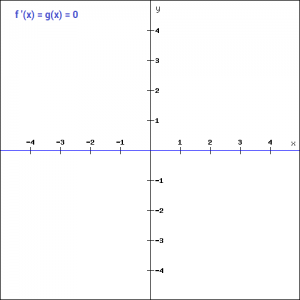


Gradients are calculated to update the weights and biases during the backprop process. Since the gradient of the function is zero, the weights and biases don’t update.

### 02- Linear Activation Function

#### Theory :

A linear function is also known as a straight-line function where the activation is proportional to the input i.e. the weighted sum from neurons. It has a simple function with the equation:

Linear functions are pretty simple. It returns what it gets as input.

```
f(x)=ax
```
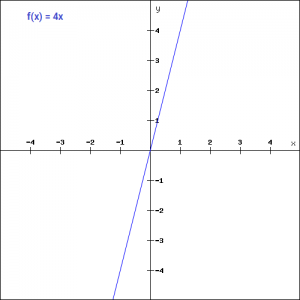


#### Code snippet :

In [ ]:
# Identity Activation function
def linear(x):
    ''' y = f(x) It returns the input as it is'''
    return x

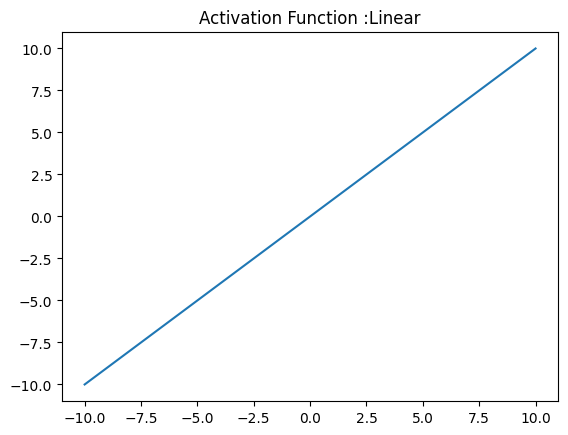

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, linear(x))
plt.axis('tight')
plt.title('Activation Function :Linear')
plt.show()

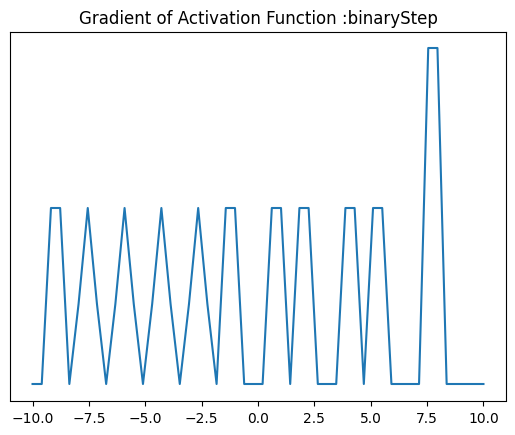

In [ ]:
x = np.linspace(-10, 10)
y=linear(x)
z=np.gradient(y)
plt.plot(x, z)
plt.axis('tight')
plt.title('Gradient of Activation Function :binaryStep')
plt.show()

#### Observation :  

Although the gradient here does not become zero, but it is a constant which does not depend upon the input value x at all. This implies that the weights and biases will be updated during the backpropagation process but the updating factor would be the same.

In this scenario, the neural network will not really improve the error since the gradient is the same for every iteration. The network will not be able to train well and capture the complex patterns from the data. Hence, linear function might be ideal for simple tasks where interpretability is highly desired.

 

### 03 - Sigmoid Activation Function

#### Theory :


Sigmoid function returns the value beteen 0 and 1.

mathematical expression for sigmoid-



```
f(x) = 1/(1+e^-x)
```



where the values lies between zero and one.


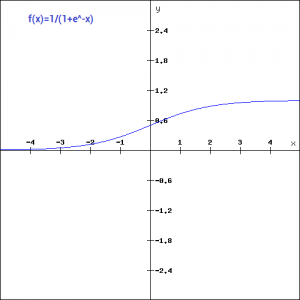

#### Code snippet : 

In [ ]:
# Sigmoid Activation Function
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''

    return 1/(1+np.exp(-x))

In [ ]:
sigmoid(7),sigmoid(-22)

(0.9990889488055994, 2.7894680920908113e-10)

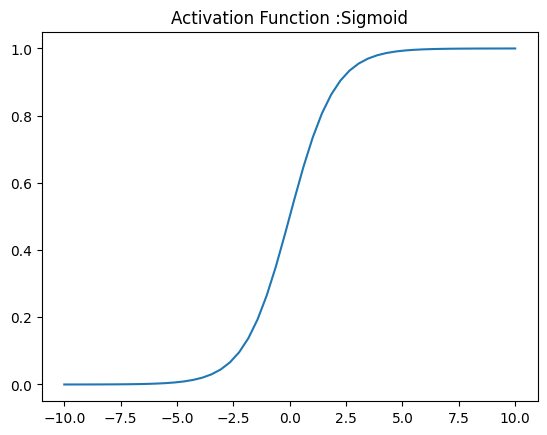

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function :Sigmoid')
plt.show()

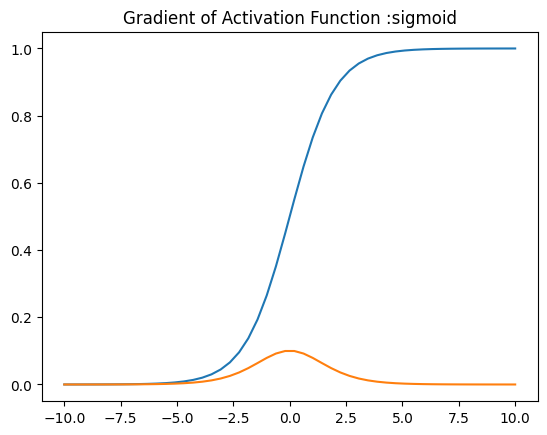

In [ ]:
x = np.linspace(-10, 10)
y=sigmoid(x)
z=np.gradient(y)
plt.plot(x, y)
plt.plot(x, z)
plt.axis('tight')
plt.title('Gradient of Activation Function :sigmoid')
plt.show()

#### Observation :

We can see that the output is between 0 and 1.

The sigmoid function is commonly used for predicting probabilities since the probability is always between 0 and 1.

One of the disadvantages of the sigmoid function is that towards the end regions the Y values respond very less to the change in X values.

The sigmoid function causes a problem mainly termed as **vanishing gradient problem** which occurs because we convert large input in between the range of 0 to 1 and therefore their derivatives become much smaller which does not give satisfactory output. To solve this problem another activation function such as ReLU is used where we do not have a small derivative problem.

### 04 - Tanh

#### Theory :

The tanh function is very similar to the sigmoid function. The only difference is that it is symmetric around the origin. 
The range of values in this case is from -1 to 1. Thus the inputs to the next layers will not always be of the same sign. The tanh function is defined as-



```
tanh(x)=2sigmoid(2x)-1

#It can be directly written as –

tanh(x)=2/(1+e^(-2x)) -1
```

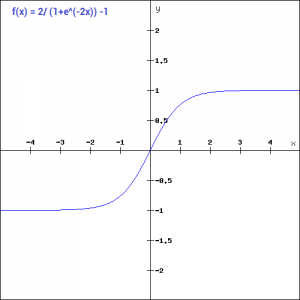



Gradient of the tan h function

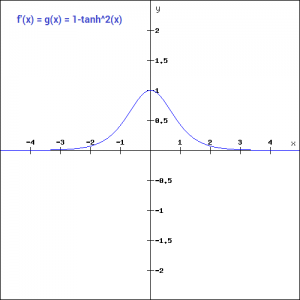

#### Code snippet :

In [ ]:
def tanh_function(x):
    z = (2/(1 + np.exp(-2*x))) -1
    return z

In [ ]:
tanh_function(0.5), tanh_function(-1)

(0.4621171572600098, -0.7615941559557649)

In [ ]:
## Tanh Activation Function
def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1.'''

    return np.tanh(x)


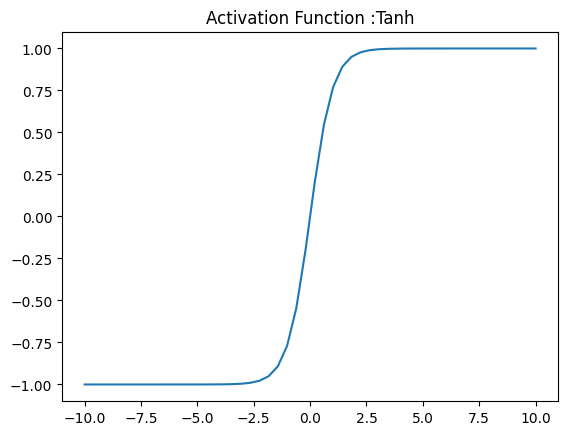

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Activation Function :Tanh')
plt.show()

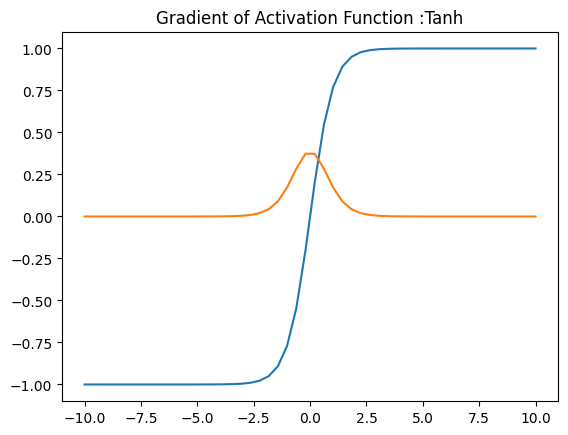

In [ ]:
x = np.linspace(-10, 10)
y=tanh(x)
z=np.gradient(y)
plt.plot(x, y)
plt.plot(x, z)
plt.axis('tight')
plt.title('Gradient of Activation Function :Tanh')
plt.show()

#### Observations : 

Tanh : It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1.

Apart from that, all other properties of tanh function are the same as that of the sigmoid function. Similar to sigmoid, the tanh function is continuous and differentiable at all points.


The gradient of the tanh function is steeper as compared to the sigmoid function. Our choice of using sigmoid or tanh would basically depend on the requirement of gradient in the problem statement. But similar to the sigmoid function we still have the vanishing gradient problem. The graph of the tanh function is flat and the gradients are very low.

### 05-(1) - RELU Activation Function

#### Theory :

ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.


```
f(x)=max(0,x)
```

RELU returns 0 if the x (input) is less than 0
RELU returns x if the x (input) is greater than 0

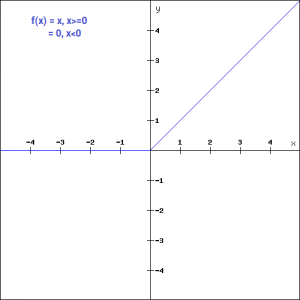


The gradient of the ReLU function.

```
f'(x) = 1, x>=0
      = 0, x<0
```


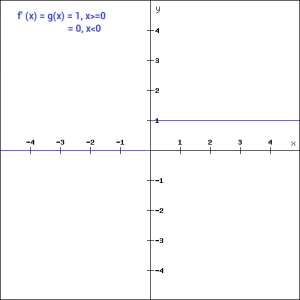


#### Code snippet :

In [ ]:
## RELU Activation Function
def relu_function(x):
    if x<0:
        return 0
    else:
        return x

In [ ]:
relu_function(7), relu_function(-7)

(7, 0)

In [ ]:
## RELU Activation Function Alternative
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1

In [ ]:
RELU([7,-7])

[7, 0]

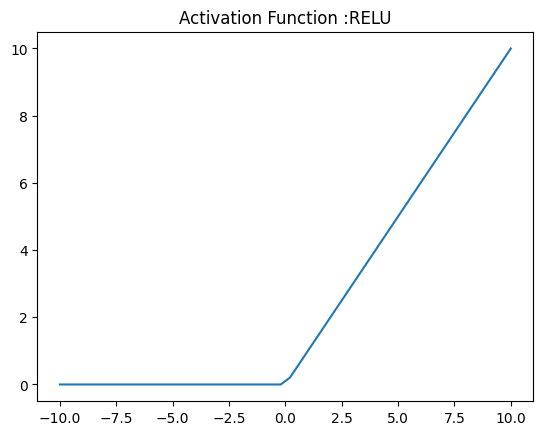

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title('Activation Function :RELU')
plt.show()

In [ ]:
def relu(x):
   return max(0.0, x)
 
x = 1.0
print('Applying Relu on (%.1f) gives %.1f' % (x, relu(x)))
x = -10.0
print('Applying Relu on (%.1f) gives %.1f' % (x, relu(x)))
x = 0.0
print('Applying Relu on (%.1f) gives %.1f' % (x, relu(x)))
x = 15.0
print('Applying Relu on (%.1f) gives %.1f' % (x, relu(x)))
x = -20.0
print('Applying Relu on (%.1f) gives %.1f' % (x, relu(x)))

Applying Relu on (1.0) gives 1.0
Applying Relu on (-10.0) gives 0.0
Applying Relu on (0.0) gives 0.0
Applying Relu on (15.0) gives 15.0
Applying Relu on (-20.0) gives 0.0


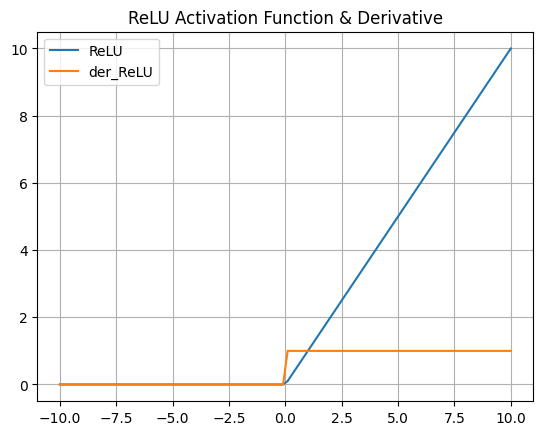

In [ ]:
# Rectified Linear Unit (ReLU)
def ReLU(x):
  data = [max(0,value) for value in x]
  return np.array(data, dtype=float)

# Derivative for ReLU
def der_ReLU(x):
  data = [1 if value>0 else 0 for value in x]
  return np.array(data, dtype=float)

# Generating data for Graph
x_data = np.linspace(-10,10,100)
y_data = ReLU(x_data)
dy_data = der_ReLU(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('ReLU Activation Function & Derivative')
plt.legend(['ReLU','der_ReLU'])
plt.grid()
plt.show()

#### Observation:

Pros:

*   The function and its derivative both are monotonic.
*   Due to its functionailty it does not activate all the neuron at the same time
*   It is efficient and easy for computation.

Cons:

*  The outputs are not zero centered similar to the sigmoid activation function
*  When the gradient hits zero for the negative values, it does not converge towards the minima which will result in a dead neuron while back propagation.


We use Leaky ReLU function instead of ReLU to avoid this unfitting, in Leaky ReLU range is expanded which enhances the performance.

### 05-(2) - Leaky ReLU

#### Theory : 

Leaky ReLU activation function can solve the ‘Dying ReLU’ problem, as discussed in ReLU, we observe that all the negative input values turn into zero very quickly and in the case of Leaky ReLU we do not make all negative inputs to zero but to a value near to zero which solves the major issue of ReLU activation function.

```
Equation : 

  f(x)= x , x>=0
  f(x)= ax, x<0


# Range : (0.01 to infinity)

```


Range : (0.01 to infinity)

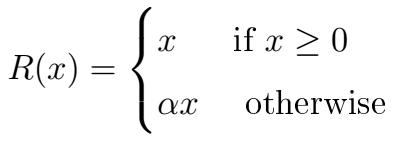 

leaky ReLU activation :

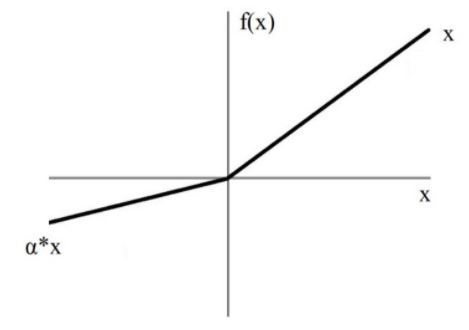

Here we have simply replaced the horizontal line with a non-zero, non-horizontal line. Here a is a small value like 0.01 or so. It can be represented on the graph as -


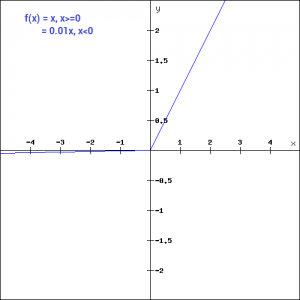

The main advantage of replacing the horizontal line is to remove the zero gradient. So in this case the gradient of the left side of the graph is non zero and so we would no longer encounter dead neurons in that region. The gradient of the graph would look like –

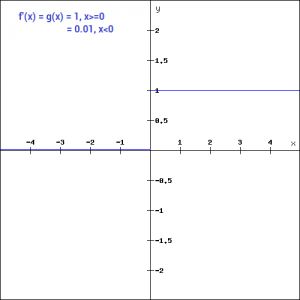

#### Code snippet :

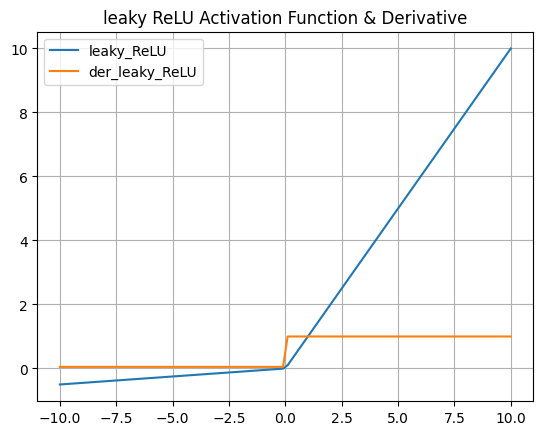

In [ ]:
# Leaky Rectified Linear Unit (leaky ReLU) Activation Function
def leaky_ReLU(x):
  data = [max(0.05*value,value) for value in x]
  return np.array(data, dtype=float)

# Derivative for leaky ReLU 
def der_leaky_ReLU(x):
  data = [1 if value>0 else 0.05 for value in x]
  return np.array(data, dtype=float)

# Generating data For Graph
x_data = np.linspace(-10,10,100)
y_data = leaky_ReLU(x_data)
dy_data = der_leaky_ReLU(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('leaky ReLU Activation Function & Derivative')
plt.legend(['leaky_ReLU','der_leaky_ReLU'])
plt.grid()
plt.show()

#### Observations :

Leaky Relu is a Revolution in Neural Network. It solves the problem of Vanishing Gradient Descent in RNNs. That is a clear reason for rising in the Deep Learning journey. Actually, Sigmoid Function’s derivative has a range between (0,0.25) which tends to zero because of the chain rule. This causes the deactivation of neurons.

&nbsp; <new line>

Pros:

* The function and its derivative both are monotonic
* It allows negative value during back propagation
* It is efficient and easy for computation.

Cons:

* Results are not always consistent
* During the front propagation if the learning rate is set very high it will overshoot killing the neuron.

&nbsp;

The idea of leaky ReLU can be extended even further. Instead of multiplying x with a constant term we can multiply it with a hyperparameter which seems to work better the leaky ReLU. This extension to leaky ReLU is known as Parametric ReLU.

### 06 - Softmax Activation Function:

#### Theory : 

Softmax function is often described as a combination of multiple sigmoids. We know that sigmoid returns values between 0 and 1, which can be treated as probabilities of a data point belonging to a particular class. Thus sigmoid is widely used for binary classification problems.

The softmax function can be used for multiclass classification problems.This function returns the probability for a datapoint belonging to each individual class.

Softmax is used mainly at the last layer i.e output layer for decision making the same as sigmoid activation works, the softmax basically gives value to the input variable according to their weight and the sum of these weights is eventually one.



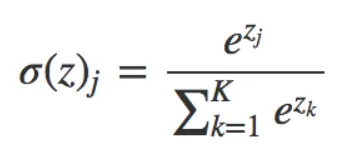

 for j = 1, 2, …, K.

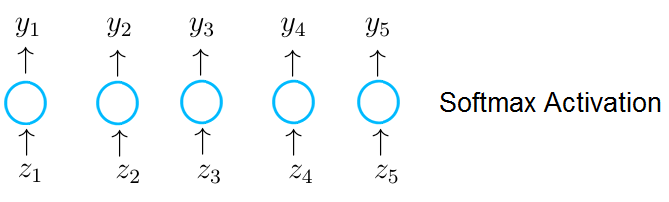


-----------------------------------------------------------

For example, returning to the image analysis we saw in Figure 1, Softmax might produce the following likelihoods of an image belonging to a particular class:

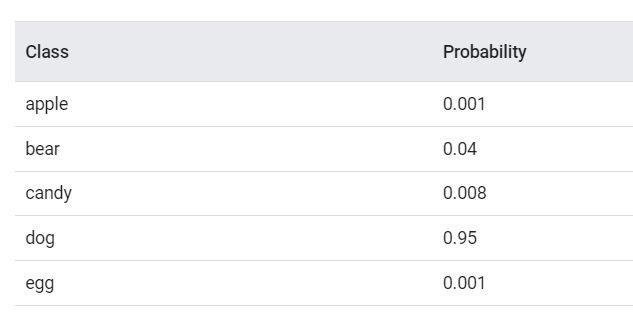

Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

A deep neural net with an input layer, two nondescript hidden layers, then a Softmax layer, and finally an output layer with the same number of nodes as the Softmax layer.

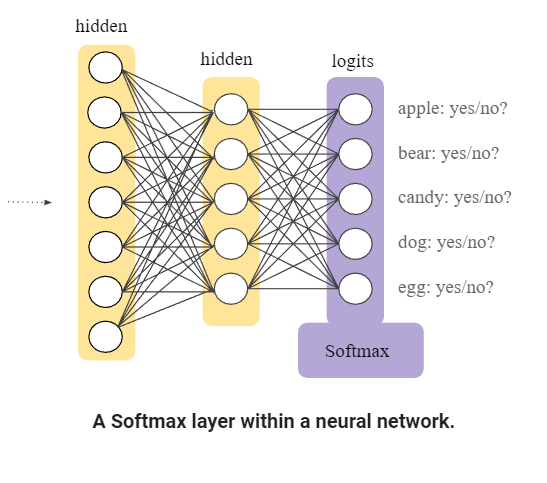

#### Code snippet :

In [ ]:
## Softmax Activation Function
def softmax(x):
    ''' Compute softmax values for each sets of scores in x. '''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

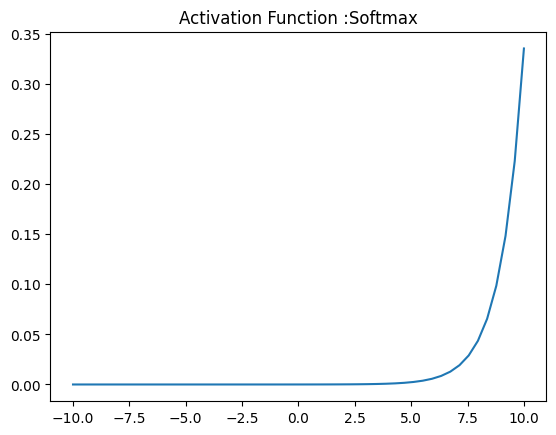

In [ ]:
x = np.linspace(-10, 10)
plt.plot(x, softmax(x))
plt.axis('tight')
plt.title('Activation Function :Softmax')
plt.show()

#### Observations:

Softmax is an activation function which converts the inputs and output of the last layer of your neural network into a discrete probability distribution over the target classes. Softmax ensures that the criteria of probability distributions that the probabilities are nonnegative and also that the sum of probabilities should be equal 1.

Although Softmax activation function is a subclass of the sigmoid function, the softmax function comes in handy when dealing with multiclass classification issues.

Used frequently when managing several classes. In the output nodes of image classification issues, the softmax was typically present. The softmax function would split by the sum of the outputs and squeeze all outputs for each category between 0 and 1.

The output unit of the classifier, where we are actually attempting to obtain the probabilities to determine the class of each input, is where the softmax function is best applied.

The usual rule of thumb is to utilise RELU, which is a usual perceptron in hidden layers and is employed in the majority of cases these days, if we really are unsure of what encoder to apply.

A very logical choice for the output layer is the sigmoid function if your input is for binary classification. If our output involves multiple classes, Softmax can be quite helpful in predicting the odds for each class.

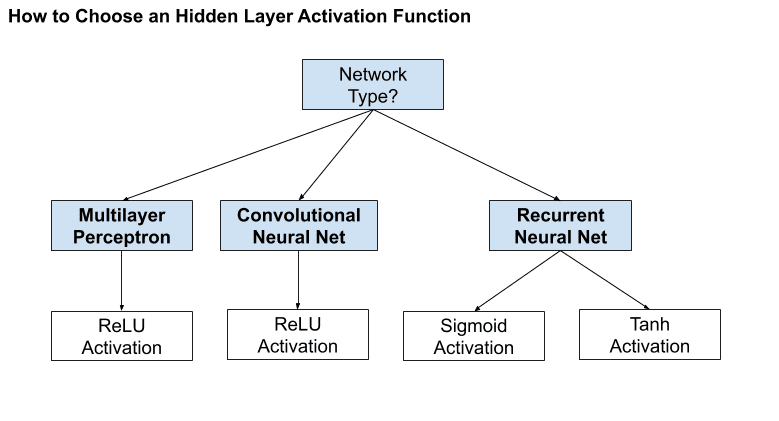

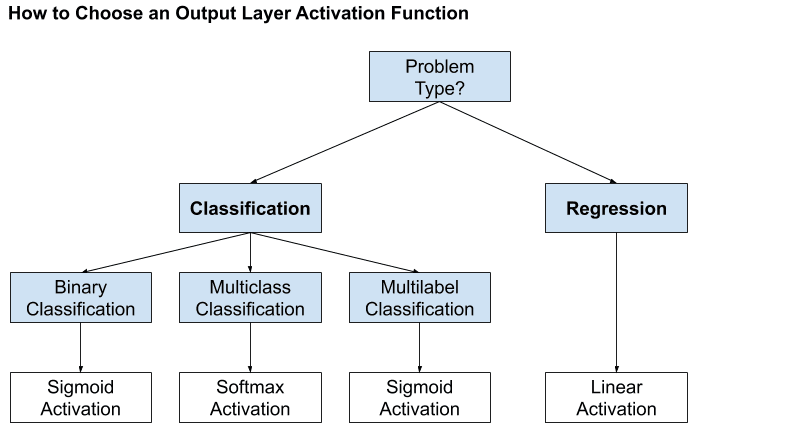